# Fast Neural Style Transfer

[Fast Neural Style Transfer](https://arxiv.org/abs/1705.06830) <br>
[model from Tensorflow Hub](https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2) 

## Imports

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt

2022-12-04 20:37:16.560175: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Utilities

In [2]:
def tensor_to_image(tensor):
  '''converts a tensor to an image'''
  tensor_shape = tf.shape(tensor)
  number_elem_shape = tf.shape(tensor_shape)
  if number_elem_shape > 3:
    assert tensor_shape[0] == 1
    tensor = tensor[0]
  return tf.keras.preprocessing.image.array_to_img(tensor) 


def load_img(path_to_img):
  '''loads an image as a tensor and scales it to 512 pixels'''
  max_dim = 512
  image = tf.io.read_file(path_to_img)
  image = tf.image.decode_jpeg(image)
  image = tf.image.convert_image_dtype(image, tf.float32)

  shape = tf.shape(image)[:-1]
  shape = tf.cast(tf.shape(image)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  image = tf.image.resize(image, new_shape)
  image = image[tf.newaxis, :]
  image = tf.image.convert_image_dtype(image, tf.uint8)

  return image


def load_images(content_path, style_path):
  '''loads the content and path images as tensors'''
  content_image = load_img("{}".format(content_path))
  style_image = load_img("{}".format(style_path))

  return content_image, style_image


def imshow(image, title=None):
  '''displays an image with a corresponding title'''
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)
    
    
def show_images_with_objects(images, titles=[]):
  '''displays a row of images with corresponding titles'''
  if len(images) != len(titles):
    return

  plt.figure(figsize=(20, 12))
  for idx, (image, title) in enumerate(zip(images, titles)):
    plt.subplot(1, len(images), idx + 1)
    plt.xticks([])
    plt.yticks([])
    imshow(image, title)


## Download the images

In [3]:
IMAGE_DIR = 'images'

# create directory
!mkdir {IMAGE_DIR}

# download images to the directory you just created
!wget -q -O ./images/cafe.jpg https://cdn.pixabay.com/photo/2018/07/14/15/27/cafe-3537801_1280.jpg
!wget -q -O ./images/swan.jpg https://cdn.pixabay.com/photo/2017/02/28/23/00/swan-2107052_1280.jpg
!wget -q -O ./images/tnj.jpg https://i.dawn.com/large/2019/10/5db6a03a4c7e3.jpg
!wget -q -O ./images/rudolph.jpg https://cdn.pixabay.com/photo/2015/09/22/12/21/rudolph-951494_1280.jpg
!wget -q -O ./images/dynamite.jpg https://cdn.pixabay.com/photo/2015/10/13/02/59/animals-985500_1280.jpg
!wget -q -O ./images/painting.jpg https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg

print("image files you can choose from: ")
!ls images

image files you can choose from: 
cafe.jpg  dynamite.jpg	painting.jpg  rudolph.jpg  swan.jpg  tnj.jpg


In [4]:
# set default images
content_path = f'{IMAGE_DIR}/swan.jpg'
style_path = f'{IMAGE_DIR}/painting.jpg'

2022-12-04 23:42:19.409316: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:26:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-04 23:42:19.412054: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:26:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-04 23:42:19.412242: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:26:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-04 23:42:19.413182: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, 

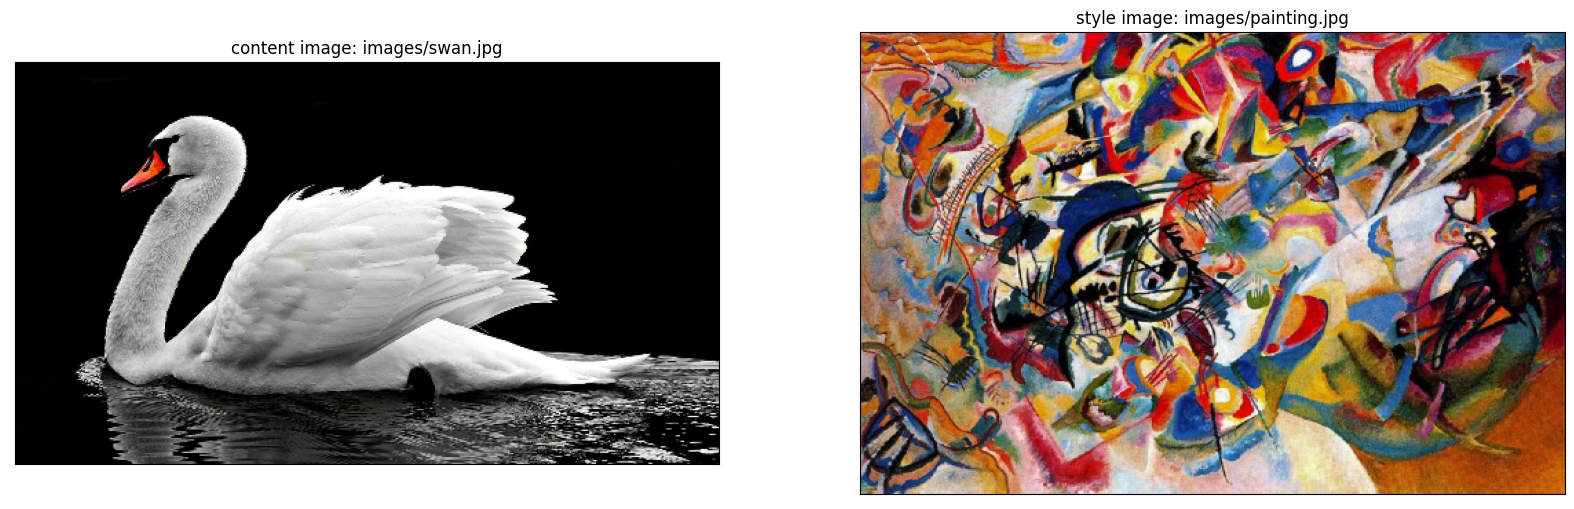

In [5]:
# display the content and style image
content_image, style_image = load_images(content_path, style_path)
show_images_with_objects([content_image, style_image], 
                         titles=[f'content image: {content_path}',
                                 f'style image: {style_path}'])

## Download the model

In [6]:
# this will take a few minutes to load
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

## Stylize the content image

2022-12-04 23:42:46.263932: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100


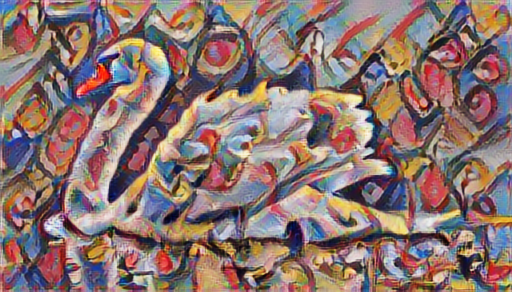

In [7]:
# stylize the image using the model you just downloaded
stylized_image = hub_module(tf.image.convert_image_dtype(content_image, tf.float32), 
                            tf.image.convert_image_dtype(style_image, tf.float32))[0]

# convert the tensor to image
tensor_to_image(stylized_image)

In [12]:
type(hub_module)

tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject

In [19]:
hub.KerasLayer(hub_module).weights[0]

<tf.Variable 'InceptionV3/Mixed_6c/Branch_1/Conv2d_0a_1x1/BatchNorm/moving_mean:0' shape=(160,) dtype=float32, numpy=
array([-5.11866249e-02, -4.15960640e-01, -5.42337112e-02, -9.52912569e-01,
        1.12755015e-01, -4.91311461e-01, -9.68312547e-02,  2.76206225e-01,
       -6.91971108e-02, -7.65123405e-03, -4.38524847e-04, -3.26322585e-01,
       -6.61193490e-01, -3.14499706e-01, -1.23079263e-01,  1.56004697e-01,
       -1.74204022e-01, -3.30719858e-01,  4.64836694e-02, -1.51352556e-02,
       -3.87275338e-01, -4.55238968e-01, -4.77899522e-01, -9.70206037e-02,
       -2.51840562e-01, -3.16165477e-01, -3.09167862e-01,  5.24905980e-01,
       -1.86437607e-01, -1.02515258e-01, -2.52395034e-01, -4.77699459e-01,
        2.68790662e-01, -1.82814509e-01, -2.29982823e-01, -6.44652322e-02,
       -1.15103513e-01,  1.55370921e-01, -4.68799055e-01, -1.57561883e-01,
        1.09915137e-01, -2.55104125e-01, -1.36623085e-01, -4.15635347e-01,
       -2.40657702e-01, -3.88806820e-01, -1.23682193e-01,